In [1]:
import os
import pandas as pd
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
from tensorflow.keras.preprocessing.image import load_img

In [2]:
font_path = 'fonts/NotoSansThai-VariableFont_wdth,wght.ttf'
thai_font = fm.FontProperties(fname=font_path)
DISEASE_CLASSES = ['ปกติ', 'โรคขอบใบแห้ง', 'โรคใบขีดโปร่งแสง', 'โรคใบจุดสีน้ำตาล', 'โรคไหม้']
TRAIN_TEXT_DIR = 'data/train_text'
TEST_TEXT_DIR = 'data/test_text'
TRAIN_IMG_DIR = 'data/train_image'
TEST_IMG_DIR = 'data/test_image'

In [3]:
# ======== TEXT EDA ========

In [4]:
def count_text(data_dir, disease_classes):
    count_dict = {disease: 0 for disease in disease_classes}

    for disease in disease_classes:
        disease_file = f"{disease}.csv"
        file_path = os.path.join(data_dir, disease_file)

        if os.path.isfile(file_path):
            df = pd.read_csv(file_path)
            count_dict[disease] = len(df)

    return count_dict

train_text_rows = count_text(TRAIN_TEXT_DIR, DISEASE_CLASSES)
test_text_rows = count_text(TEST_TEXT_DIR, DISEASE_CLASSES)

print("Data counts in train text files:", train_text_rows)
print("Data counts in test text files:", test_text_rows)

Data counts in train text files: {'ปกติ': 250, 'โรคขอบใบแห้ง': 250, 'โรคใบขีดโปร่งแสง': 250, 'โรคใบจุดสีน้ำตาล': 250, 'โรคไหม้': 250}
Data counts in test text files: {'ปกติ': 62, 'โรคขอบใบแห้ง': 62, 'โรคใบขีดโปร่งแสง': 62, 'โรคใบจุดสีน้ำตาล': 62, 'โรคไหม้': 62}


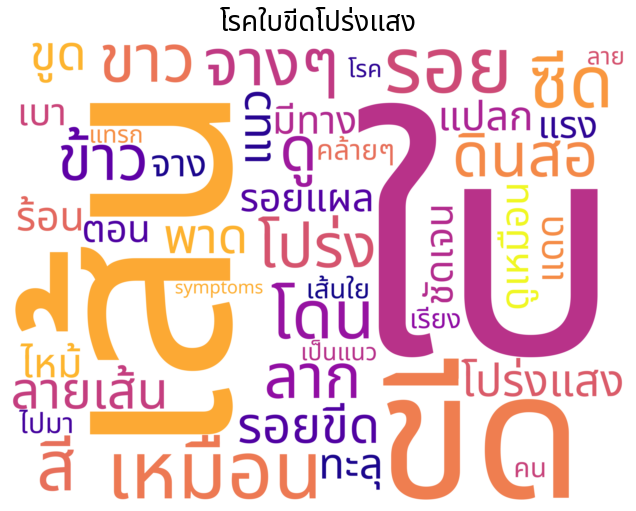

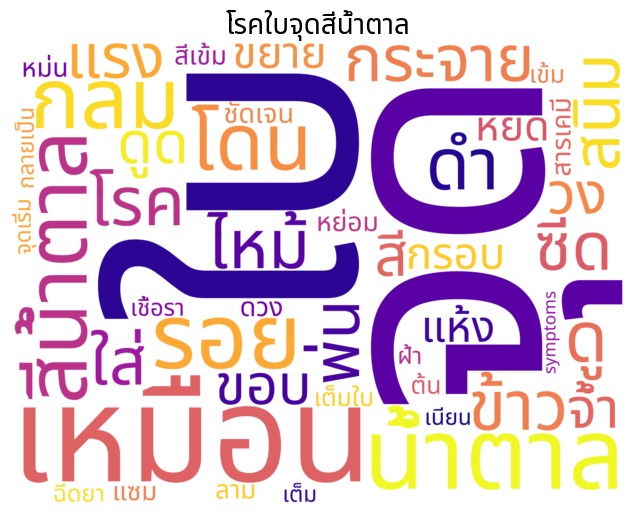

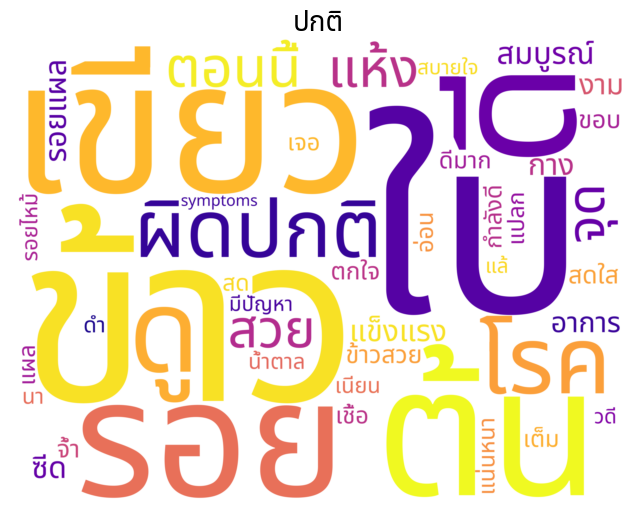

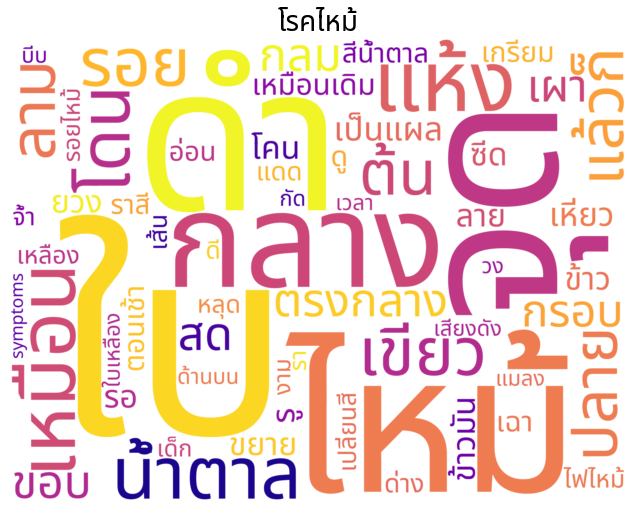

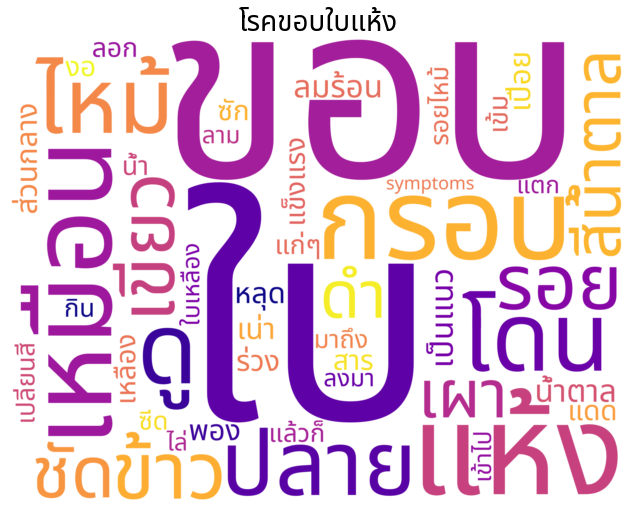

In [5]:
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords

# ==== Thai tokenizer ====
def thai_tokenizer(text):
    return word_tokenize(text, engine='newmm')

for file in os.listdir(TRAIN_TEXT_DIR):
    if file.endswith('.csv'):
        path = os.path.join(TRAIN_TEXT_DIR, file)
        df = pd.read_csv(path, header=None, encoding='utf-8')

        text = " ".join(df.iloc[:, 0].dropna().astype(str))

        tokenized_text = " ".join(thai_tokenizer(text))

        wc = WordCloud(
            font_path=font_path,
            stopwords=thai_stopwords(),
            relative_scaling=0.3,
            min_font_size=1,
            background_color="white",
            width=1024,
            height=768,
            colormap='plasma',
            scale=3,
            font_step=4,
            collocations=False,
            regexp=r"[ก-๙a-zA-Z']+"
        ).generate(tokenized_text)

        plt.figure(figsize=(12, 6))
        plt.imshow(wc, interpolation='bilinear')
        plt.title(file.replace('.csv', ''), fontproperties=thai_font, fontsize=20)
        plt.axis('off')
        plt.show()

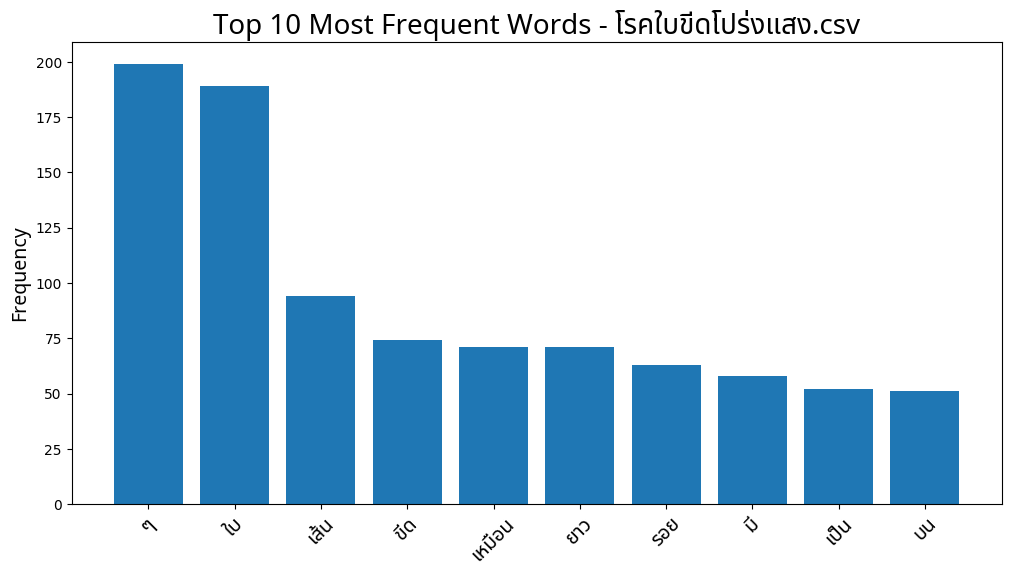

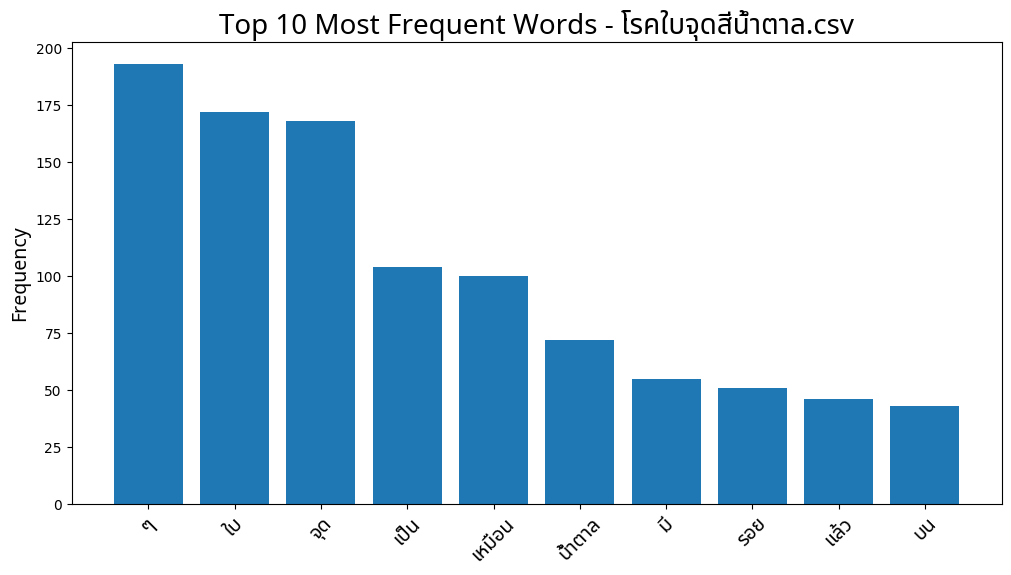

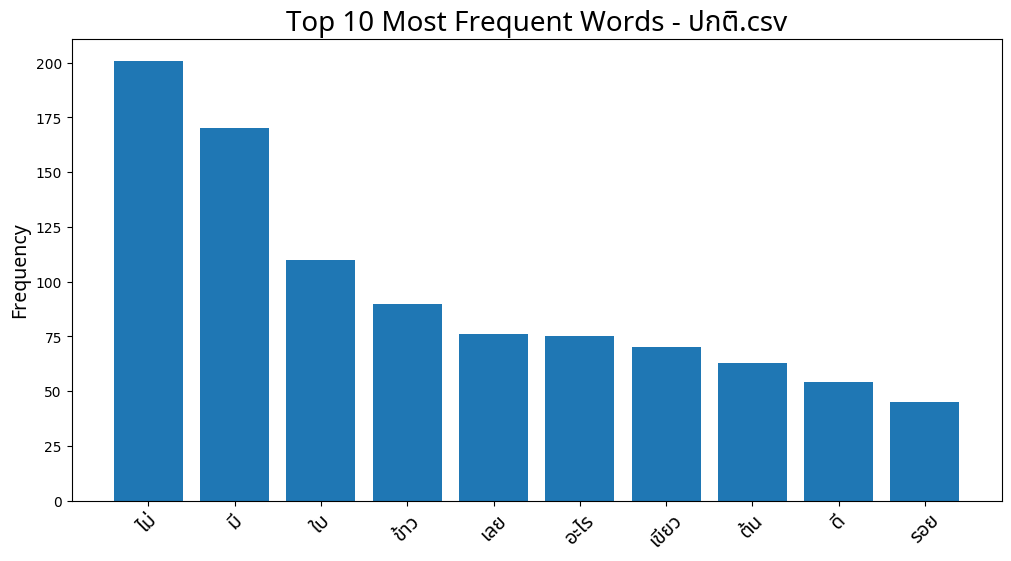

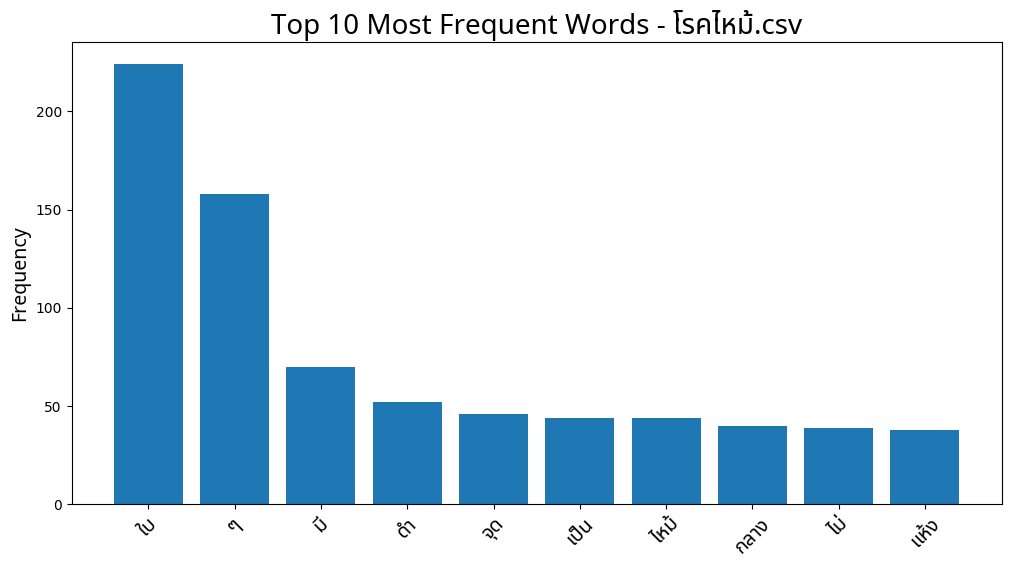

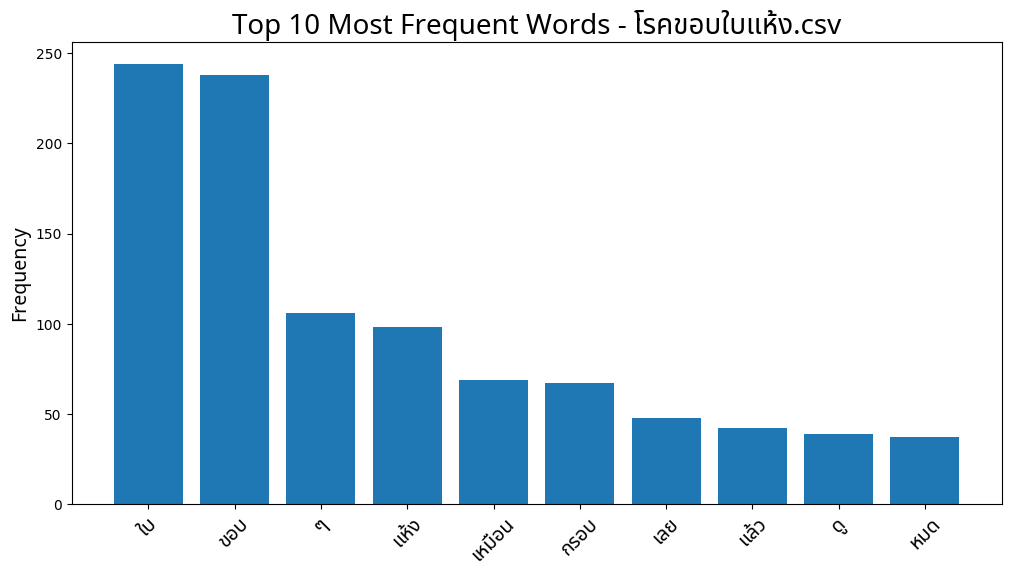

In [6]:
def process_file(file):
    path = os.path.join(TRAIN_TEXT_DIR, file)
    df = pd.read_csv(path, header=None, encoding='utf-8')
    text = " ".join(df.iloc[:, 0].dropna().astype(str))

    filtered_tokens = [word for word in word_tokenize(text, engine='newmm') if word.strip() != '']

    word_counts = Counter(filtered_tokens)

    most_common_words = word_counts.most_common(10)

    words, freqs = zip(*most_common_words)

    plt.figure(figsize=(12, 6))
    plt.bar(words, freqs)
    plt.title(f'Top 10 Most Frequent Words - {file}', fontproperties=thai_font, fontsize=20)
    plt.xticks(rotation=45, fontproperties=thai_font, fontsize=14)
    plt.ylabel('Frequency', fontproperties=thai_font, fontsize=14)
    plt.show()

for file in os.listdir(TRAIN_TEXT_DIR):
    if file.endswith('.csv'):
        process_file(file)

In [7]:
# ======== IMAGE EDA ========

In [8]:
def count_image_files_in_disease_folders(data_dir, disease_classes):
    count_dict = {disease: 0 for disease in disease_classes}

    for disease in disease_classes:
        disease_dir = os.path.join(data_dir, disease)

        if os.path.isdir(disease_dir):
            image_files = [f for f in os.listdir(disease_dir) if f.endswith('.jpg') | f.endswith('.JPG')]
            count_dict[disease] = len(image_files)

    return count_dict

train_image_files = count_image_files_in_disease_folders(TRAIN_IMG_DIR, DISEASE_CLASSES)
test_image_files = count_image_files_in_disease_folders(TEST_IMG_DIR, DISEASE_CLASSES)

print("Image counts in train image files:", train_image_files)
print("Image counts in test image files:", test_image_files)

Image counts in train image files: {'ปกติ': 250, 'โรคขอบใบแห้ง': 250, 'โรคใบขีดโปร่งแสง': 250, 'โรคใบจุดสีน้ำตาล': 250, 'โรคไหม้': 250}
Image counts in test image files: {'ปกติ': 62, 'โรคขอบใบแห้ง': 62, 'โรคใบขีดโปร่งแสง': 62, 'โรคใบจุดสีน้ำตาล': 62, 'โรคไหม้': 62}


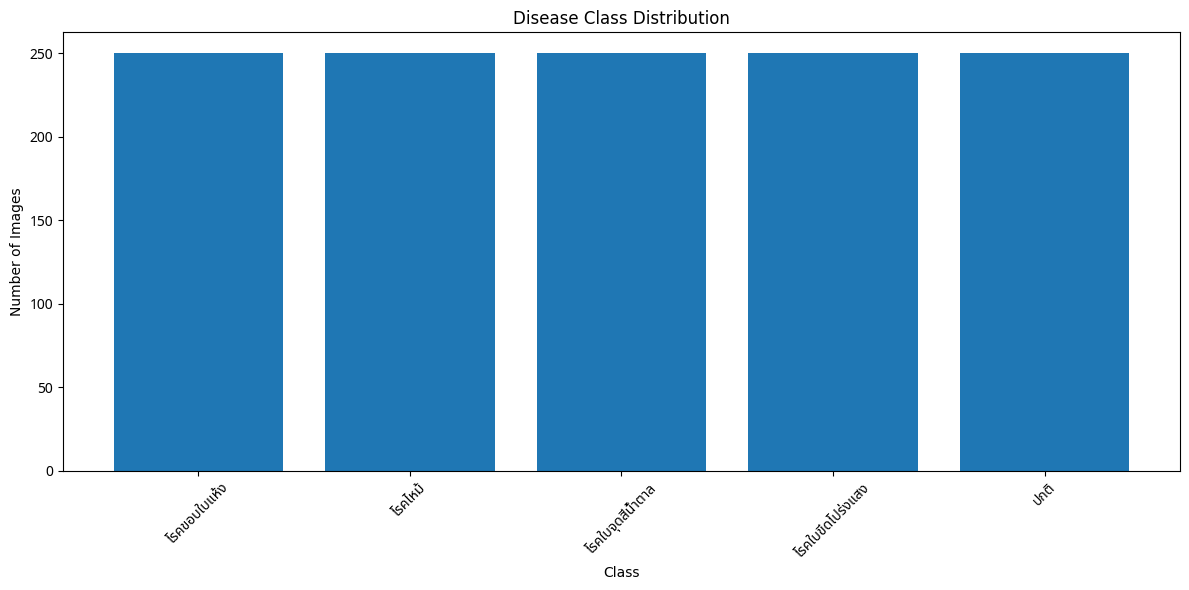

In [9]:
class_labels = []
for class_name in os.listdir(TRAIN_IMG_DIR):
    class_path = os.path.join(TRAIN_IMG_DIR, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory
        class_images = [f for f in os.listdir(class_path) if f.endswith('.jpg') or f.endswith('.png')]
        class_labels.extend([class_name] * len(class_images))

# Plot class distribution
class_count = Counter(class_labels)
plt.figure(figsize=(12, 6))
plt.bar(class_count.keys(), class_count.values())
plt.title('Disease Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, fontproperties=thai_font)
plt.yticks(fontproperties=thai_font)
plt.tight_layout()
plt.show()

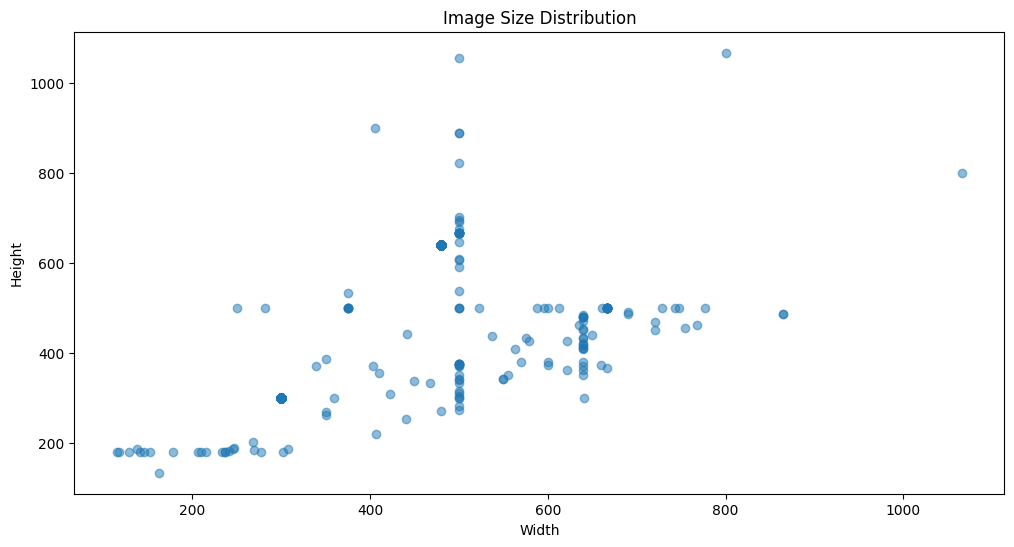

In [11]:
image_sizes = []

for class_name in os.listdir(TRAIN_IMG_DIR):
    class_path = os.path.join(TRAIN_IMG_DIR, class_name)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                img_path = os.path.join(class_path, filename)
                with Image.open(img_path) as img:
                    image_sizes.append(img.size)

# image size distribution
widths, heights = zip(*image_sizes)
plt.figure(figsize=(12, 6))
plt.scatter(widths, heights, alpha=0.5)
plt.title('Image Size Distribution')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

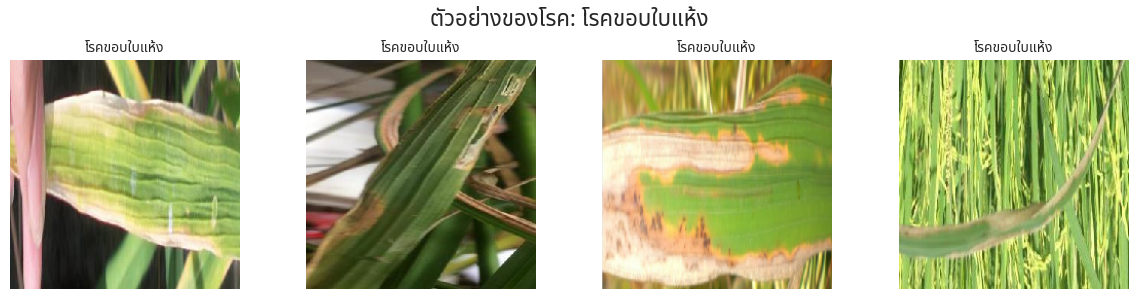

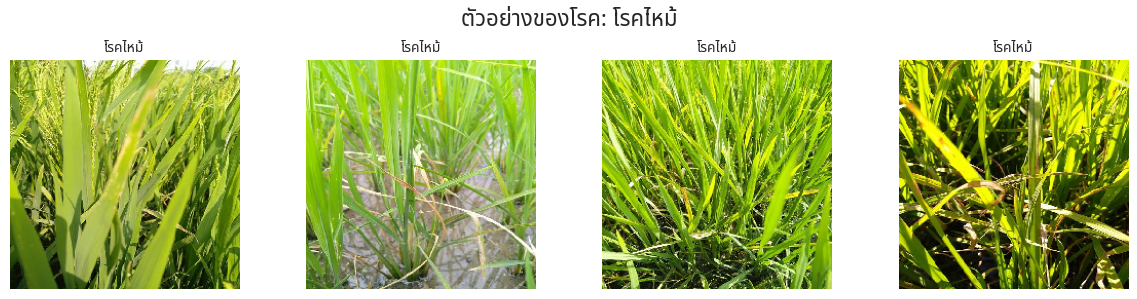

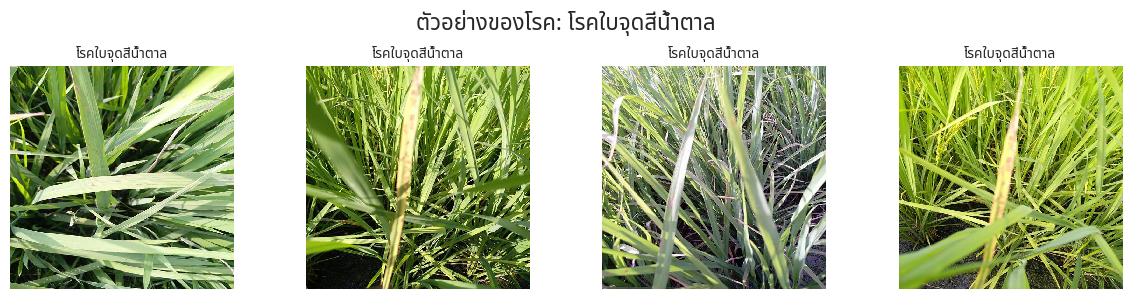

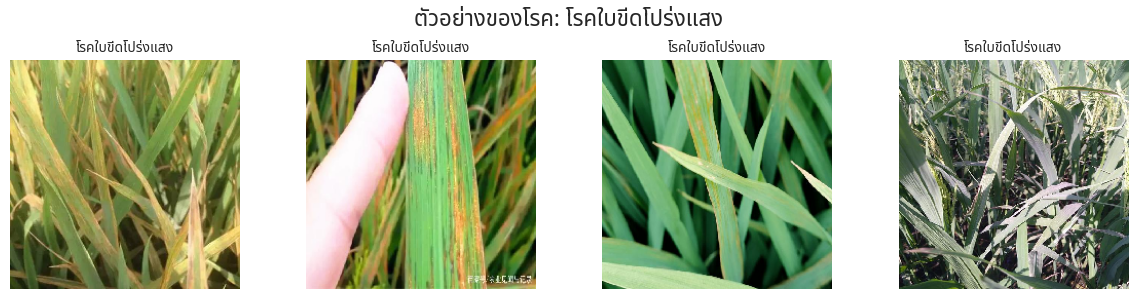

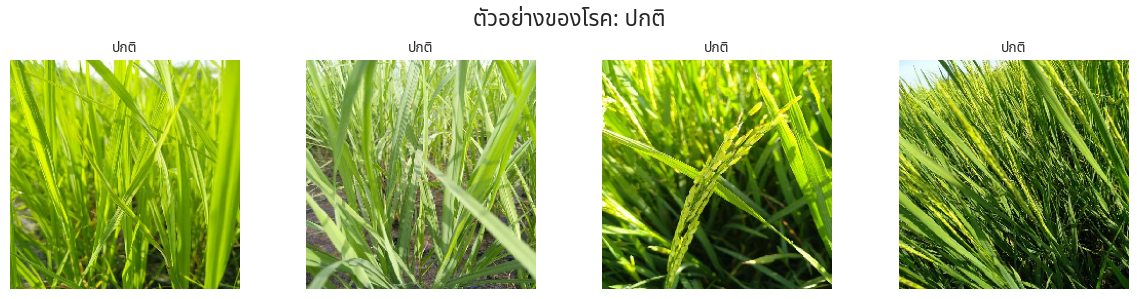

In [125]:
for disease in os.listdir(TRAIN_IMG_DIR):
    folder = os.path.join(TRAIN_IMG_DIR, disease)
    if os.path.isdir(folder):
        sample_imgs = os.listdir(folder)[:4]
        plt.figure(figsize=(12, 3))
        for idx, img_file in enumerate(sample_imgs):
            img_path = os.path.join(folder, img_file)
            img = load_img(img_path, target_size=(224, 224))
            plt.subplot(1, 4, idx + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(disease, fontproperties=thai_font)
        plt.suptitle(f"ตัวอย่างของโรค: {disease}", fontproperties=thai_font, fontsize=16)
        plt.tight_layout()
        plt.show()